In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.metrics import confusion_matrix
#from churn_display import draw_confusion_matrices

In [2]:
target = pd.read_csv('kaggle_data_01.csv')

In [3]:
target.head()

,person_id,date,Id,Prediction1
0,person_9,02.06.2017 10:03:36,1,3.0
1,person_9,09.06.2017 8:34:08,2,3.0
2,person_9,16.06.2017 10:19:03,3,3.0
3,person_9,23.06.2017 12:08:57,4,3.0
4,person_9,30.06.2017 12:48:39,5,4.0


In [4]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 4 columns):
person_id      414 non-null object
date           414 non-null object
Id             414 non-null int64
Prediction1    258 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 13.0+ KB


In [5]:
target['date'] = pd.to_datetime(target['date'])
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 4 columns):
person_id      414 non-null object
date           414 non-null datetime64[ns]
Id             414 non-null int64
Prediction1    258 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 13.0+ KB


In [6]:
target['Prediction1'].unique()

array([ 3.,  4.,  1.,  5.,  2., nan])

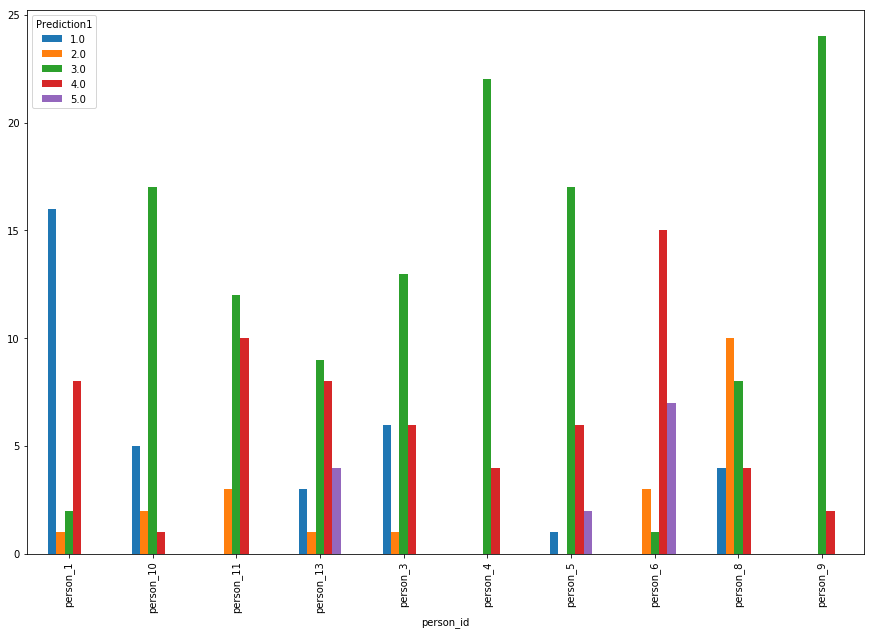

In [7]:
target.groupby(['person_id', 'Prediction1']).size().unstack().plot.bar(figsize=(15,10));

In [8]:
persons = target['person_id'].unique()

In [9]:
df = target.groupby(['person_id']).count()
new_persons = df.loc[df['Prediction1'] == 0].index.values
known_persons = df.loc[df['Prediction1'] != 0].index.values

---

In [20]:
data = pd.read_csv('kaggle_data_02.csv', header=None)
header = list(np.arange(data.shape[1]))
header[0] = 'person_id'
header[1] = 'date'
data.columns = header
data['date'] = pd.to_datetime(data['date'])

In [21]:
data.head()

,person_id,date,2,3,4,5,6,7,8,9,...,458,459,460,461,462,463,464,465,466,467
0,person_1,2017-06-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,person_1,2017-06-02,29.0,12.0,37.0,32.0,128.0,16.0,2.0,15.0,...,16.0,0.0,57.0,15.0,16.0,3.0,0.0,21.0,7.0,10.0
2,person_1,2017-06-03,10.0,4.0,10.0,8.0,34.0,4.0,1.0,4.0,...,4.0,0.0,11.0,4.0,4.0,1.0,2.0,19.0,6.0,6.0
3,person_1,2017-06-04,3.0,3.0,3.0,6.0,40.0,3.0,1.0,3.0,...,3.0,0.0,6.0,3.0,3.0,0.0,1.0,16.0,4.0,4.0
4,person_1,2017-06-05,4.0,3.0,12.0,11.0,62.0,4.0,1.0,4.0,...,4.0,0.0,17.0,4.0,4.0,2.0,2.0,20.0,6.0,7.0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2379 entries, 0 to 2378
Columns: 468 entries, person_id to 467
dtypes: datetime64[ns](1), float64(464), int64(2), object(1)
memory usage: 8.5+ MB
